# PROJECT NAME - CHURN REDUCTION

# Project Description:-

* Churn (loss of customers to competition) is a problem for companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. This problem statement is targeted at enabling churn reduction using analytics concepts.

# The Business Pain:

* Churn rate has strong impact on life time value of the customer because it affects the length of service and the future revenue of the company.

* It is estimated that 70 percent of the subscribers signing up with a new wireless carrier every year are coming from another service provider, which means they are supposed to be churners.

* Telecom Companies spend hundreds of crores of rupess to acquire a new customer and when that customer leaves, the company not only losses their revenue from that customer but also the resources spend to acquire a new customer.


 
# The Problem Category Falls Under:

* Here the problem statement addresses that the problem category belongs to Supervised Learning and it belongs to Classification. 

* Because we are trying to classify a customer or any dataset and here the given dataset has a Target Variable: 

* That is if the customer has moved then <b>{1='Yes'/'True',0='No'/False}</b>, here <b>1=True/Yes</b>:- States that the <b>Customer has Moved</b> and <b>0=No/False</b>:- States that the <b>Customer Has not Moved</b> so whenever you are trying to "Predict the Categories" or you are trying to classify into the categories that "Use-Case" comes under the "Classification Problem".

# Importing & Loading Standard Libraries

In [1]:
#Load the Standard Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from fancyimpute import KNN

# Importing the sci-kit learn package modules for model development, evaluation & also optimization
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# Setting up the working directory
os.chdir("E:\DataScienceEdwisor\PythonScripts")

#Checking the current working directory
os.getcwd()

'E:\\DataScienceEdwisor\\PythonScripts'

In [3]:
# Loading the dataset which is in '.CSV' format i.e; (Comma-Seperated-Values)
train_actual = pd.read_csv("Train_data.csv")
test_actual = pd.read_csv("Test_data.csv")

In [4]:
# Before we make any manipulation let's create an alternate copy of our actual train and test data sets
train_data = train_actual.copy()
test_data = test_actual.copy()

In [5]:
# lets Exploring few observations of the Train-dataset
train_data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge   ...     total eve calls  total eve charge  \
0             45.07   ...                  99             16.78   
1             27.47   ...                 103             16.62   
2             41.38   ...                 110             10.30   
3             50.90   ...                  88              5.26   
4             28.34   ...                 122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number customer service calls    Churn  
0                              1   False.  
1                              1   False.  
2                              0   False.  
3                              2   False.  
4                              3   False.  

[5 rows x 21 columns]

In [6]:
# Lets also Exploring few observations of the Test-dataset
test_data.head()

state  account length  area code phone number international plan  \
0    HI             101        510     354-8815                 no   
1    MT             137        510     381-7211                 no   
2    OH             103        408     411-9481                 no   
3    NM              99        415     418-9100                 no   
4    SC             108        415     413-3643                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total day charge   ...     total eve calls  total eve charge  \
0             12.05   ...                  73             18.01   
1             38.01   ...                 139             20.81   
2             50.10   ...                 105             20.17   
3             36.86   ...                  88             10.74   
4             33.56   ...                 101             10.54   

   total night minutes  total night calls  total night charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total intl minutes  total intl calls  total intl charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number customer service calls    Churn  
0                              3   False.  
1                              0   False.  
2                              1   False.  
3                              1   False.  
4                              2   False.  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [7]:
# Checking the Dimensions of the dataset
print("Dimensions of the training Dataset", train_data.shape)

print("\n******************************************************************************")

print("Dimensions of the test Dataset", test_data.shape)

print("\n******************************************************************************")

# Checking the total observations by combining both train & test data

data = train_data.append(test_data)

print("Total No. Observations of the combine Dataset", data.shape)

print("\n******************************************************************************")

Dimensions of the training Dataset (3333, 21)

******************************************************************************
Dimensions of the test Dataset (1667, 21)

******************************************************************************
Total No. Observations of the combine Dataset (5000, 21)

******************************************************************************


In [8]:
# Checking the Information about the dataframe

print("Information about  Training DataFrame including the Index data-type and Column data-types")

print(train_data.info())

Information about  Training DataFrame including the Index data-type and Column data-types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null 

In [9]:
# Checking the descriptive statistics of the dataset

print("Generates descriptive statistics for each feature")

train_data.describe()

Generates descriptive statistics for each feature


account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  number customer service calls  
count        3333.000000                    3333.000000  
mean            2.764581                       1.562856  
std             0.753773                       1.315491  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.270000                       2.000000  
max             5.400000                       9.000000

In [10]:
# Column names of the dataset
train_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [11]:
#Extracting Unique values and Count using a for loop on the whole data

for i in train_data.columns:
    print(i, '***************', len(train_data[i].value_counts()))


state *************** 51
account length *************** 212
area code *************** 3
phone number *************** 3333
international plan *************** 2
voice mail plan *************** 2
number vmail messages *************** 46
total day minutes *************** 1667
total day calls *************** 119
total day charge *************** 1667
total eve minutes *************** 1611
total eve calls *************** 123
total eve charge *************** 1440
total night minutes *************** 1591
total night calls *************** 120
total night charge *************** 933
total intl minutes *************** 162
total intl calls *************** 21
total intl charge *************** 162
number customer service calls *************** 10
Churn *************** 2


In [12]:
# Now lest check the churn count and precentage rate in out dataset
print(train_data['Churn'].value_counts())

print('\n***************************************')

print(train_data['Churn'].value_counts(normalize=True))

print('\n***************************************')

 False.    2850
 True.      483
Name: Churn, dtype: int64

***************************************
 False.    0.855086
 True.     0.144914
Name: Churn, dtype: float64

***************************************


# Missing Values Data Check in train & test and its Percentage

In [13]:
# Missing value analysis check for Train Dataset
total = train_data.isnull().sum().sort_values(ascending=True)
percnt = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
miss_train_data = pd.concat([total,percnt], axis = 1, keys=['Total_miss_val_train','Percentage_train'])
miss_train_data

Total_miss_val_train  Percentage_train
Churn                                             0               0.0
account length                                    0               0.0
area code                                         0               0.0
international plan                                0               0.0
number customer service calls                     0               0.0
number vmail messages                             0               0.0
phone number                                      0               0.0
state                                             0               0.0
total day calls                                   0               0.0
total day charge                                  0               0.0
total day minutes                                 0               0.0
total eve calls                                   0               0.0
total eve charge                                  0               0.0
total eve minutes                                 0               0.0
total intl calls                                  0               0.0
total intl charge                                 0               0.0
total intl minutes                                0               0.0
total night calls                                 0               0.0
total night charge                                0               0.0
total night minutes                               0               0.0
voice mail plan                                   0               0.0

In [14]:
# Missing value analysis check for Test Dataset
total = test_data.isnull().sum().sort_values(ascending=True)
percnt = (test_data.isnull().sum()/test_data.isnull().count()*100).sort_values(ascending=False)
miss_test_data = pd.concat([total,percnt], axis = 1, keys=['Total_miss_val_test','Percentage_test'])
miss_test_data

Total_miss_val_test  Percentage_test
Churn                                            0              0.0
account length                                   0              0.0
area code                                        0              0.0
international plan                               0              0.0
number customer service calls                    0              0.0
number vmail messages                            0              0.0
phone number                                     0              0.0
state                                            0              0.0
total day calls                                  0              0.0
total day charge                                 0              0.0
total day minutes                                0              0.0
total eve calls                                  0              0.0
total eve charge                                 0              0.0
total eve minutes                                0              0.0
total intl calls                                 0              0.0
total intl charge                                0              0.0
total intl minutes                               0              0.0
total night calls                                0              0.0
total night charge                               0              0.0
total night minutes                              0              0.0
voice mail plan                                  0              0.0

In [15]:
# Before we proceed furthur let's extract categorical variables 
cat_names = train_data.select_dtypes(exclude=np.number).columns.tolist()
cat_names.append('area code')
cat_names

['state',
 'phone number',
 'international plan',
 'voice mail plan',
 'Churn',
 'area code']

In [16]:
# Lets Change the train and test columns to Categorical data types
train_data[cat_names] = train_data[cat_names].apply(pd.Categorical)
test_data[cat_names] = test_data[cat_names].apply(pd.Categorical)

# Anlyzing Data Through Visualization

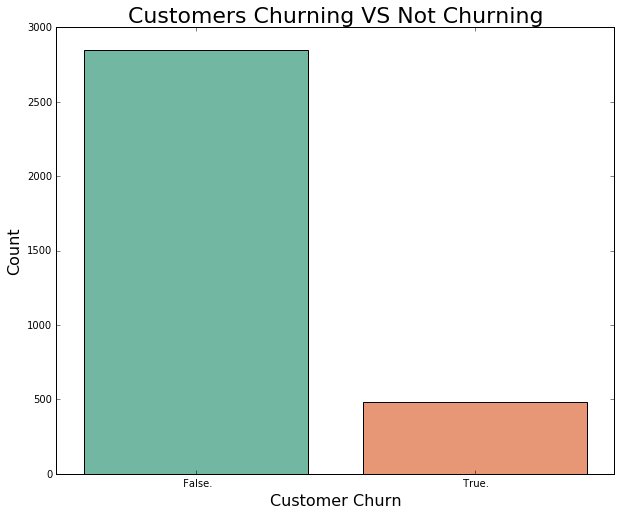

In [17]:
# Lets analyze the target variable Churn
plt.figure(figsize=(10,8))
sns.countplot(x = train_data.Churn, palette='Set2')
plt.title('Customers Churning VS Not Churning', fontsize=22)
plt.xlabel('Customer Churn',fontsize=16)
plt.ylabel('Count',fontsize=16) 

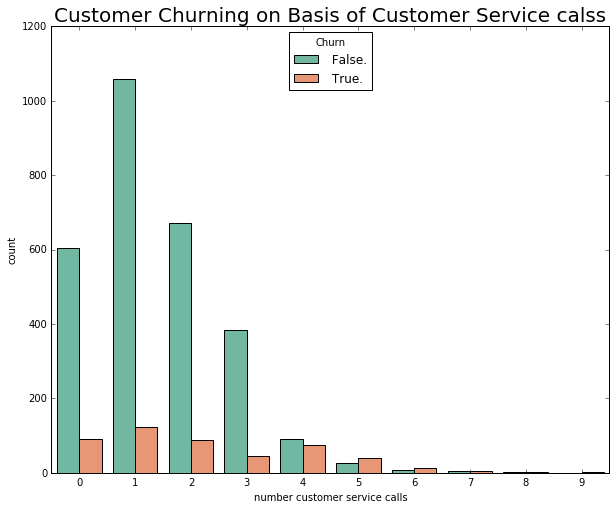

In [18]:
# Lets analyze the Churn of Customer's on basis of customer service calls
plt.figure(figsize=(10,8))
plt.title('Customer Churning on Basis of Customer Service calss', fontsize=20)
sns.countplot(x='number customer service calls', hue='Churn', data=train_data, palette="Set2")

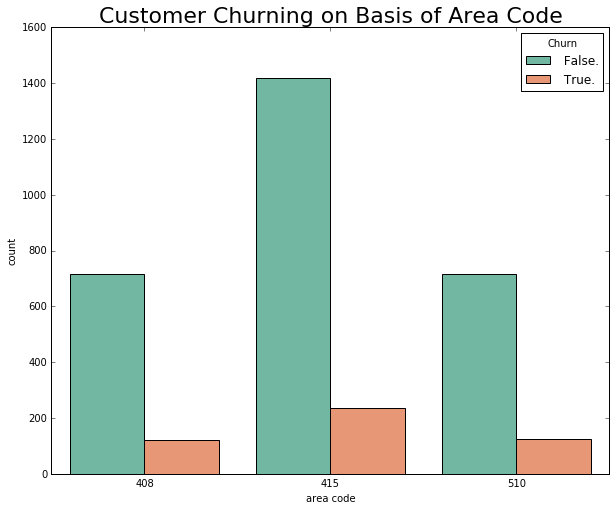

In [19]:
#Lets also analyze through area-code wise the customer's Churn
plt.figure(figsize=(10,8))
plt.title('Customer Churning on Basis of Area Code', fontsize=22)
sns.countplot(x='area code', hue='Churn', data=train_data, palette="Set2")

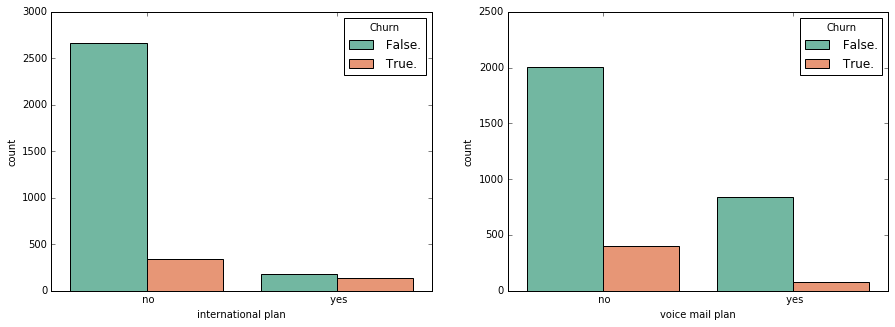

In [20]:
# Lets analyze the customer Churn on basis of International Plan & Voice mail Plan by BAR PLot Analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='international plan', hue='Churn', data=train_data, ax=ax[0], palette="Set2")
sns.countplot(x='voice mail plan', hue='Churn', data=train_data, ax=ax[1], palette="Set2")

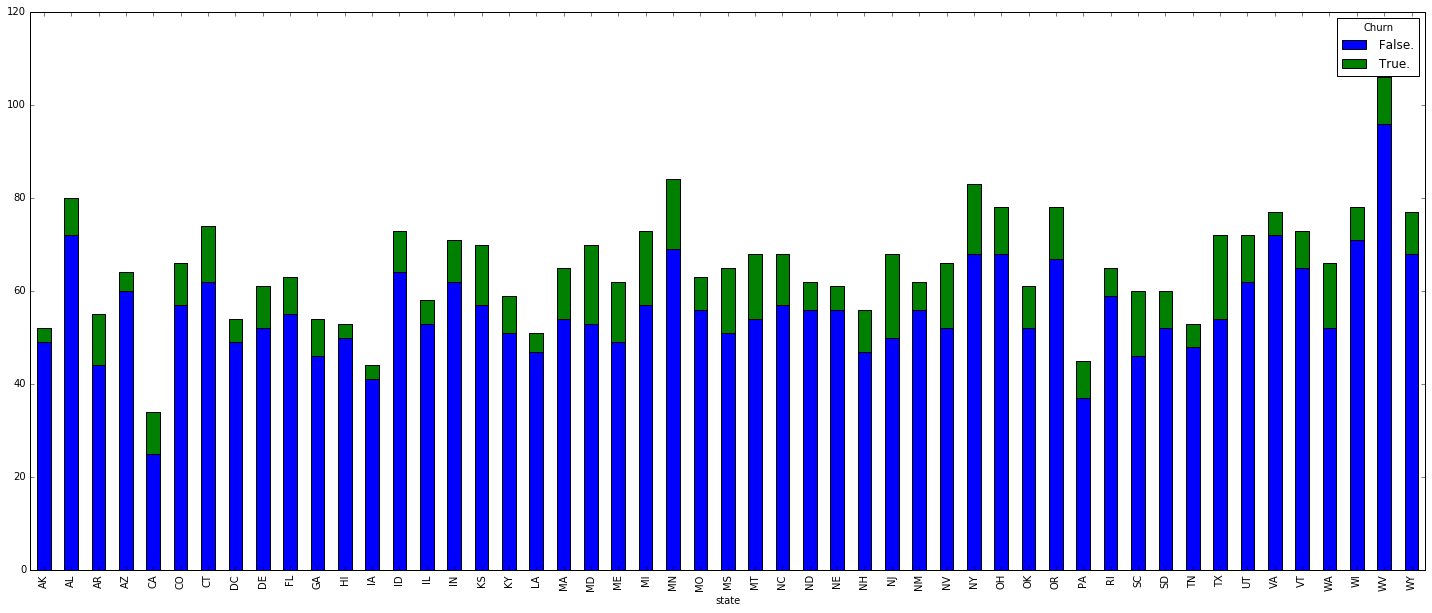

In [21]:
# Lets analyze the Cutomer Churn by State here we are using Groupby function to unstack the Categories
train_data.groupby(['state','Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(25,10))

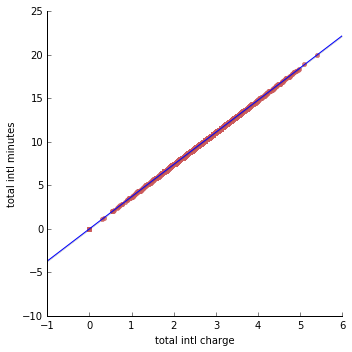

In [22]:
#Lets analyze the linearity between Total-International-Charge & Minutes 
sns.lmplot(x='total intl charge',y='total intl minutes', data=train_data, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

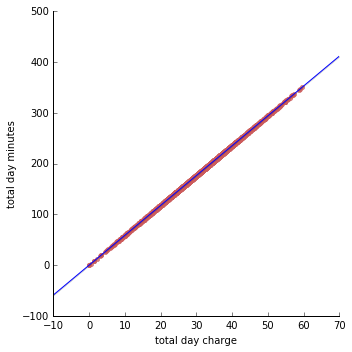

In [23]:
#Lets analyze the linearity between the Total-Day-Charge & Minutes
sns.lmplot(x='total day charge',y='total day minutes', data=train_data, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

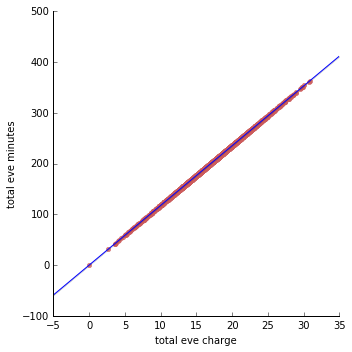

In [24]:
#Lets analyze the linearity between the Total-Evening-Charge & Minutes
sns.lmplot(x='total eve charge',y='total eve minutes', data=train_data, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

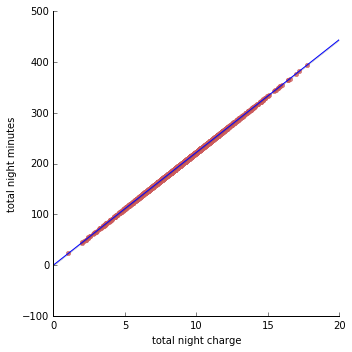

In [25]:
#Lets analyze the linearity between the Total-Night-Charge & Minutes
sns.lmplot(x='total night charge',y='total night minutes', data=train_data, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

# Boxplot Analysis for Outliers check

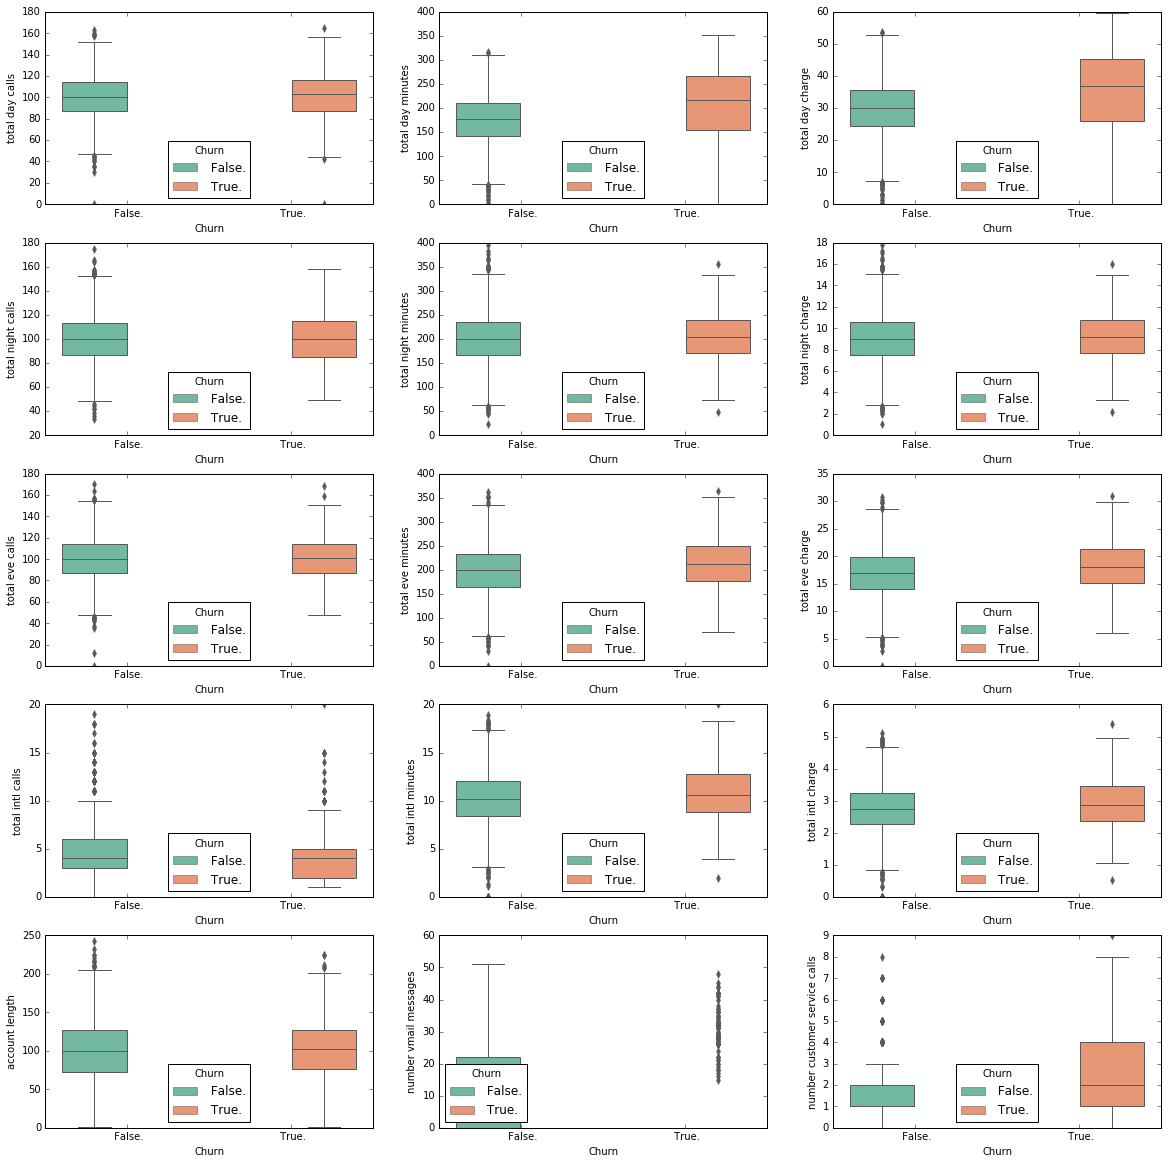

In [26]:
# Boxplot for checking Outliers in our dataset
f, axes = plt.subplots(5, 3, figsize=(20, 20))
# total_day_calls
sns.boxplot(x='Churn', y='total day calls', data=train_data, hue='Churn', palette="Set2", ax=axes[0, 0])
# total_day_minutes
sns.boxplot(x='Churn', y='total day minutes', data=train_data, hue='Churn', palette="Set2", ax=axes[0, 1])
# total_day_charge
sns.boxplot(x='Churn', y='total day charge', data=train_data, hue='Churn', palette="Set2", ax=axes[0, 2])
# total_night_calls
sns.boxplot(x='Churn', y='total night calls', data=train_data, hue='Churn', palette="Set2", ax=axes[1, 0])
# total_night_minutes
sns.boxplot(x='Churn', y='total night minutes', data=train_data, hue='Churn', palette="Set2", ax=axes[1, 1])
# total_night_charge
sns.boxplot(x='Churn', y='total night charge', data=train_data, hue='Churn', palette="Set2", ax=axes[1, 2])
# total_eve_calls
sns.boxplot(x='Churn', y='total eve calls', data=train_data, hue='Churn', palette="Set2", ax=axes[2, 0])
# total_eve_minutes
sns.boxplot(x='Churn', y='total eve minutes', data=train_data, hue='Churn', palette="Set2", ax=axes[2, 1])
# total_eve_charge
sns.boxplot(x='Churn', y='total eve charge', data=train_data, hue='Churn', palette="Set2", ax=axes[2, 2])
# total_intl_calls
sns.boxplot(x='Churn', y='total intl calls', data=train_data, hue='Churn', palette="Set2", ax=axes[3, 0])
# total_intl_minutes
sns.boxplot(x='Churn', y='total intl minutes', data=train_data, hue='Churn', palette="Set2", ax=axes[3, 1])
# total_intl_charge
sns.boxplot(x='Churn', y='total intl charge', data=train_data, hue='Churn', palette="Set2", ax=axes[3, 2])
# account_length
sns.boxplot(x='Churn', y='account length', data=train_data, hue='Churn', palette="Set2", ax=axes[4, 0])
# number_vmail_messages
sns.boxplot(x='Churn', y='number vmail messages', data=train_data, hue='Churn', palette="Set2", ax=axes[4, 1])
# number_customer_service_calls
sns.boxplot(x='Churn', y='number customer service calls', data=train_data, hue='Churn', palette="Set2", ax=axes[4, 2])

As we can see that almost all features/predictors contains outliers and we will try to remove the outliers from the dataset.
but here we will remove the outliers from the combined dataset that is <b>'data'</b> dataset which we have combined both train
test dataset so that if we remove the outliers and then do Knn imputation still the data will be reduced and already we have only 5000 records data for analysis which is small so here we will just apply Outlier Analysis but will not use this dataset for further predictions.


# Outlier Analysis

* An outlier is nothing but which is inconsistent with the rest of the dataset. In simple terms
* We can say that any value which is falling away from the bunch of values is nothing but an <b>'Outlier'</b>

In [27]:
# Lets seperate the numeric values becoz outlier analysis is applicable only on 'Numeric/Continous Values'
# Lets exclude the category vriables and only numeric columns will be selected her

cnames = train_data.columns[(train_data.dtypes=="float64")|(train_data.dtypes=="int64")].tolist()
print(cnames)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls']


In [28]:
# Lets detect and delete outliers from data-set 
# Outliers which fall above the upper fence which is 1.5*IQR and below fence 1.5*IQR will be dropped
for i in cnames:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75, 25])
    
    # iqr-Inter Quartile Range
    iqr = q75 - q25
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    
    print(iqr)
    print(min)
    print(max)
    
# Replace the values with np.nan    
    data = data.drop(data[data.loc[:,i] < min].index)
    data = data.drop(data[data.loc[:,i] > max].index)

account length
54.0
-8.0
208.0
number vmail messages
17.0
-25.5
42.5
total day minutes
72.4
35.2
324.8
total day calls
26.0
48.0
152.0
total day charge
12.2
6.2
55.0
total eve minutes
67.0
66.4
334.4
total eve calls
27.0
46.5
154.5
total eve charge
5.66
5.72
28.36
total night minutes
67.45
65.525
335.325
total night calls
27.0
45.5
153.5
total night charge
3.0
3.02
15.02
total intl minutes
3.5
3.25
17.25
total intl calls
3.0
-1.5
10.5
total intl charge
0.92
0.94
4.62
number customer service calls
1.0
-0.5
3.5


# Lets do Boxplot Analysis as we have dropped Outliers from our Data Dataset

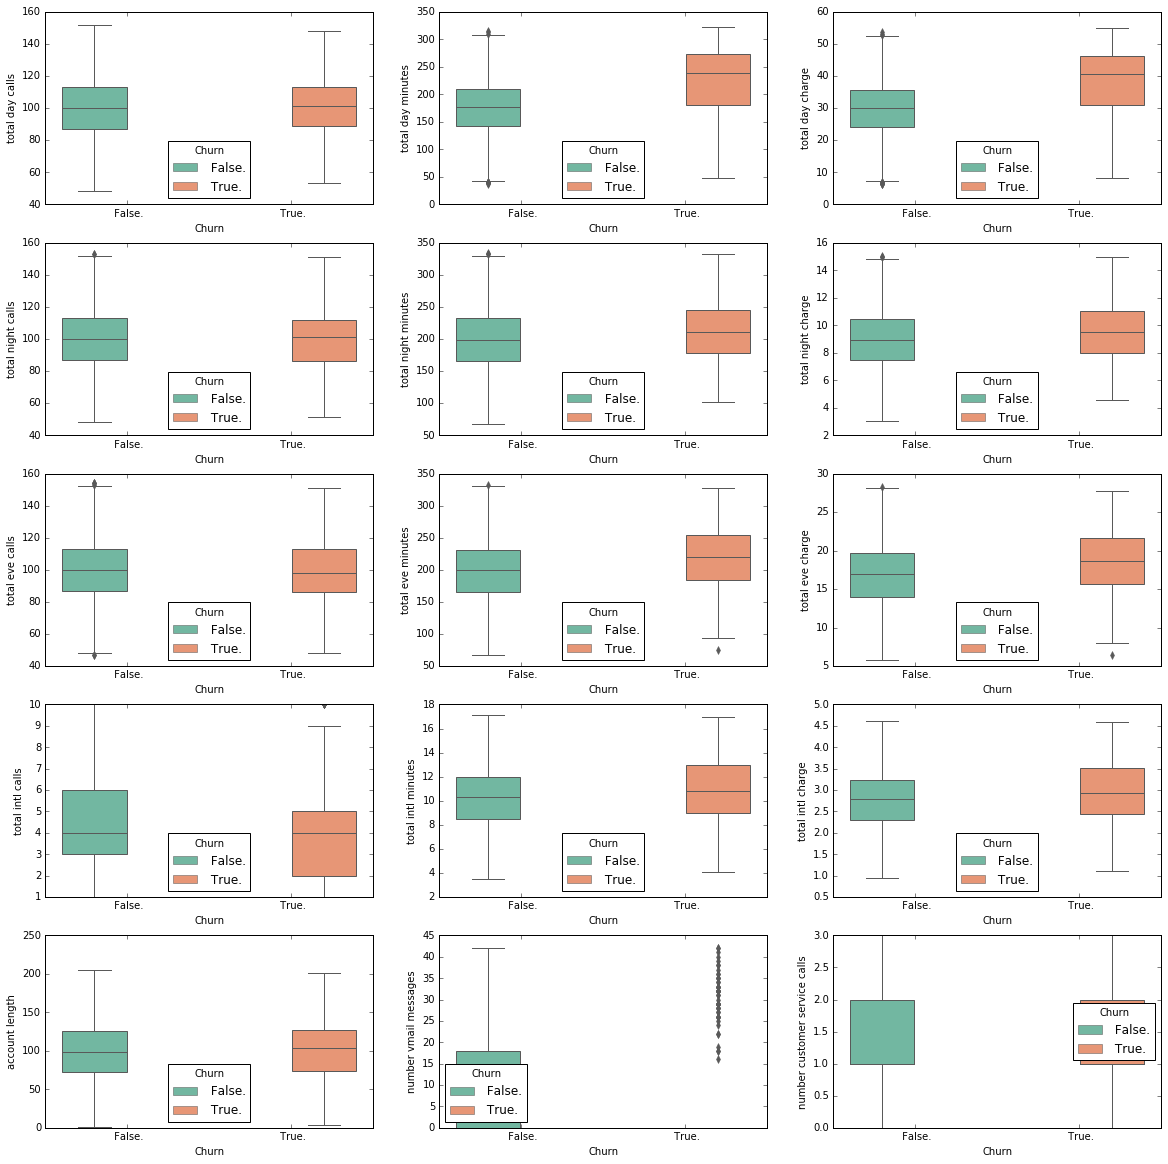

In [29]:
# Boxplot for checking Outliers in our dataset
f, axes = plt.subplots(5, 3, figsize=(20, 20))
# total_day_calls
sns.boxplot(x='Churn', y='total day calls', data=data, hue='Churn', palette="Set2", ax=axes[0, 0])
# total_day_minutes
sns.boxplot(x='Churn', y='total day minutes', data=data, hue='Churn', palette="Set2", ax=axes[0, 1])
# total_day_charge
sns.boxplot(x='Churn', y='total day charge', data=data, hue='Churn', palette="Set2", ax=axes[0, 2])
# total_night_calls
sns.boxplot(x='Churn', y='total night calls', data=data, hue='Churn', palette="Set2", ax=axes[1, 0])
# total_night_minutes
sns.boxplot(x='Churn', y='total night minutes', data=data, hue='Churn', palette="Set2", ax=axes[1, 1])
# total_night_charge
sns.boxplot(x='Churn', y='total night charge', data=data, hue='Churn', palette="Set2", ax=axes[1, 2])
# total_eve_calls
sns.boxplot(x='Churn', y='total eve calls', data=data, hue='Churn', palette="Set2", ax=axes[2, 0])
# total_eve_minutes
sns.boxplot(x='Churn', y='total eve minutes', data=data, hue='Churn', palette="Set2", ax=axes[2, 1])
# total_eve_charge
sns.boxplot(x='Churn', y='total eve charge', data=data, hue='Churn', palette="Set2", ax=axes[2, 2])
# total_intl_calls
sns.boxplot(x='Churn', y='total intl calls', data=data, hue='Churn', palette="Set2", ax=axes[3, 0])
# total_intl_minutes
sns.boxplot(x='Churn', y='total intl minutes', data=data, hue='Churn', palette="Set2", ax=axes[3, 1])
# total_intl_charge
sns.boxplot(x='Churn', y='total intl charge', data=data, hue='Churn', palette="Set2", ax=axes[3, 2])
# account_length
sns.boxplot(x='Churn', y='account length', data=data, hue='Churn', palette="Set2", ax=axes[4, 0])
# number_vmail_messages
sns.boxplot(x='Churn', y='number vmail messages', data=data, hue='Churn', palette="Set2", ax=axes[4, 1])
# number_customer_service_calls
sns.boxplot(x='Churn', y='number customer service calls', data=data, hue='Churn', palette="Set2", ax=axes[4, 2])

Now we can see that now most of the outliers have been dropped. Lets Check the dimension of the dataset.

In [30]:
# Lets check the dimension of the data dataset

print("Total No. Observations of the  Dataset", data.shape)

print("\n******************************************************************************")

# As we can see that before we applied the Outlier Analysis the dimension of the dataset was
# Toatal No. Observations of the combine Dataset (5000, 21)
# After outlier Analysis the dimension of the dataset
# Total No. Observations of the  Dataset (3666, 21)
# As we can see that data is gradually reducing so here we are going to skip outlier analysis on our train_data & test_data 
# dataset which we are going to use for model development & predictions.

Total No. Observations of the  Dataset (3666, 21)

******************************************************************************


Here We are skipping outlier analysis as their is already target class imbalance problem in our dataset
and we may also loose so much of important information and already data is not too big if run outliers analysis our data is gradually reducing.

# Feature Selection 

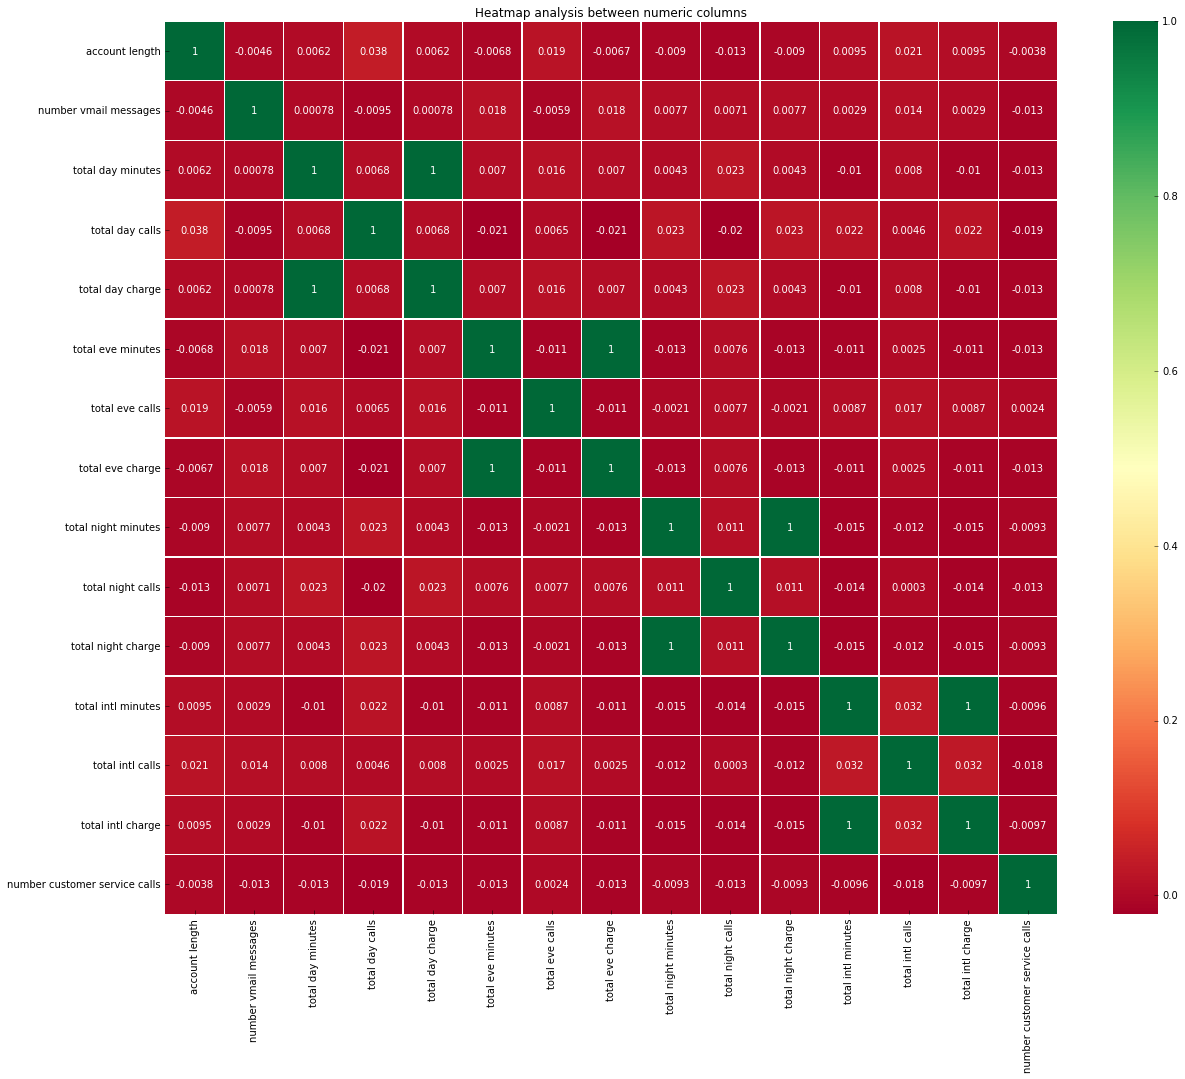

In [31]:
# Generate the Correlation matrix 
corr = train_data[cnames].corr()

# Ploting using seaborn library
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.title("Heatmap analysis between numeric columns")
plt.show()

There is Multi-Collinearity between total_day_minutes & total_day_charge, total_eve_minutes & total_eve_charge,
total_intl_minutes & total_intl_charge & total_night_minutes & total_night_charge

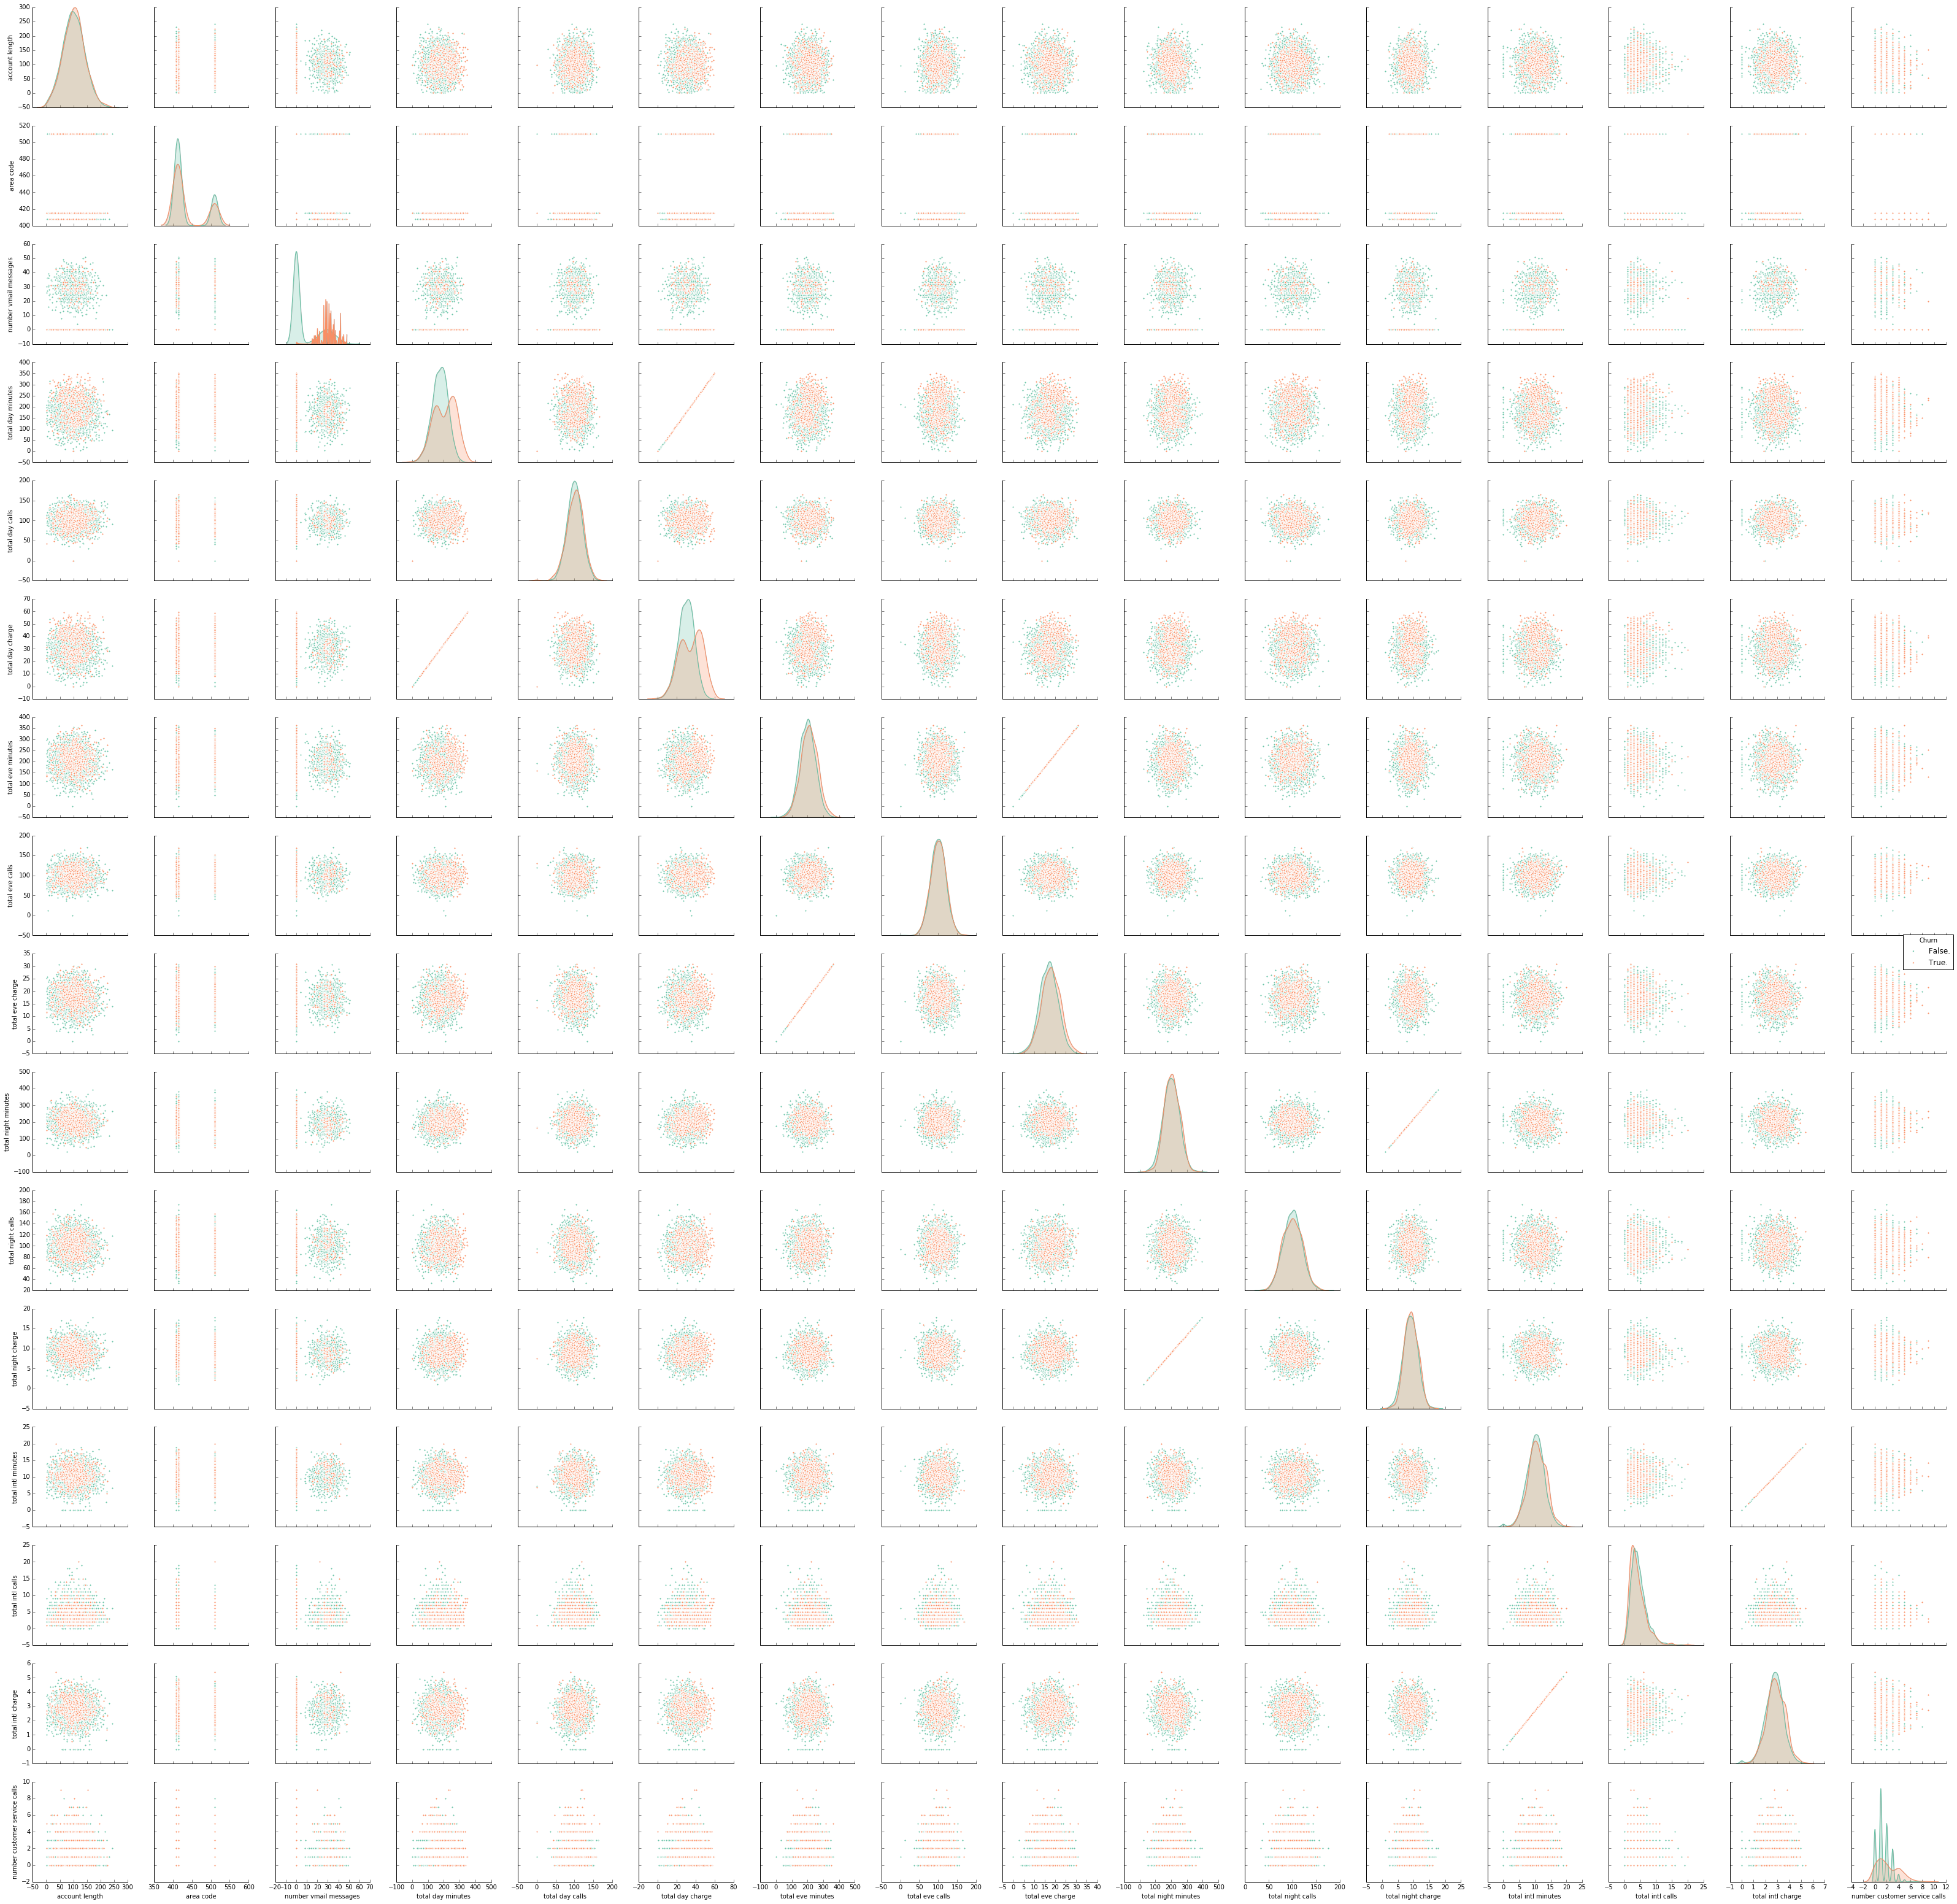

In [32]:
# Lets analyze through pair plot 
sns.pairplot(train_data,hue='Churn',palette ='Set2',size=2.7,diag_kind='kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
plt.tight_layout()
plt.show()

# Lets Analyze Chi2-Square Test of Independence for Categorical Variables

In [33]:
# Chi2 square test of independence for checking relation between Categorical variables and target varoable
# Lets save all categorical column names
cat_names = ['state', 'area code', 'international plan', 'voice mail plan']

print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in cat_names:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_data['Churn'], train_data[i]))
    print(p)
    print("-----------------------------") 

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 values depend
# on each other else we accept alternate hypothesis saying that these 2 values are independent of each other

Chi2-Square Test of Independence

*******************************
state
0.00229622155201
-----------------------------
area code
0.915055696024
-----------------------------
international plan
2.49310770332e-50
-----------------------------
voice mail plan
5.15063965904e-09
-----------------------------


From Chi2-Square Test of Independence we can analyze that the value of area code is grater than p-value which is 0.05 nad here
area code value is (0.915055696024 > 0.05), so in dimension reduction we are going to drop the variable.

# Dimension Reduction

In [34]:
# Dropping the correlated variables total-day, evening, night and international charge, as well state area code & phone number
# which are not carrying usefull information to explain the variance of  target variable lets drop from both train&test dataset
train_data = train_data.drop(columns=['state','phone number','area code','total day charge', 
                                      'total eve charge', 'total night charge', 'total intl charge'])
test_data = test_data.drop(columns=['state','phone number','area code','total day charge', 
                                    'total eve charge', 'total night charge', 'total intl charge'])

# Feature Selection and confirming our final Continous&Categorical Features

In [35]:
# Lets re-check the numeric column variables and ctegorical columns variables
# Lets update them as we have dropped some of the features
cnames = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 
          'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 
          'total intl calls','number customer service calls']
print(cnames)
print('********************************************************')
# Lets recheck the categorical names now
cat_names = ['international plan', 'voice mail plan','Churn']

print(cat_names)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'number customer service calls']
********************************************************
['international plan', 'voice mail plan', 'Churn']


# Assigning levels to Categorical Columns

In [36]:
#Lets Handle Categorical Columns now by assigning levels (0 & 1) 
cat_names = train_data.columns[train_data.dtypes == 'category']
for i in cat_names:
    #print(i)
    train_data[i] = train_data[i].cat.codes
    test_data[i] = test_data[i].cat.codes

# Lets Do Some More Exploration of our data  

In [37]:
# Lets apply groupby with International-Plan
intl_plan=train_data.groupby("international plan").size()
intl_plan

international plan
0    3010
1     323
dtype: int64

In [38]:
# Lets now analyze how many customers have subscribed and not subscribed to International plan in percent
print("Subscribed to International-Plan in percent:\t{}".format((intl_plan[0]/3333)*100))
print("Not Subscribed to International-Plan in percent:\t{}".format((intl_plan[1]/3333)*100))

Subscribed to International-Plan in percent:	90.3090309030903
Not Subscribed to International-Plan in percent:	9.69096909690969


In [39]:
# Lets apply the groupby with Voice mail plan now
vmail_plan = train_data.groupby('voice mail plan').size()
vmail_plan

voice mail plan
0    2411
1     922
dtype: int64

In [40]:
# Lets now analyze how many customers have subscribed and not subscribed to Voice Mail Plan in percent
print("Subscribed to International-Plan in percent:\t{}".format((vmail_plan[1]/3333)*100))
print("Not Subscribed to International-Plan in percent:\t{}".format((vmail_plan[0]/3333)*100))

Subscribed to International-Plan in percent:	27.662766276627664
Not Subscribed to International-Plan in percent:	72.33723372337234


In [41]:
# Lets groupby customer service calls now
custmr_calls = data.groupby('number customer service calls').size()
custmr_calls

number customer service calls
0     805
1    1402
2     919
3     540
dtype: int64

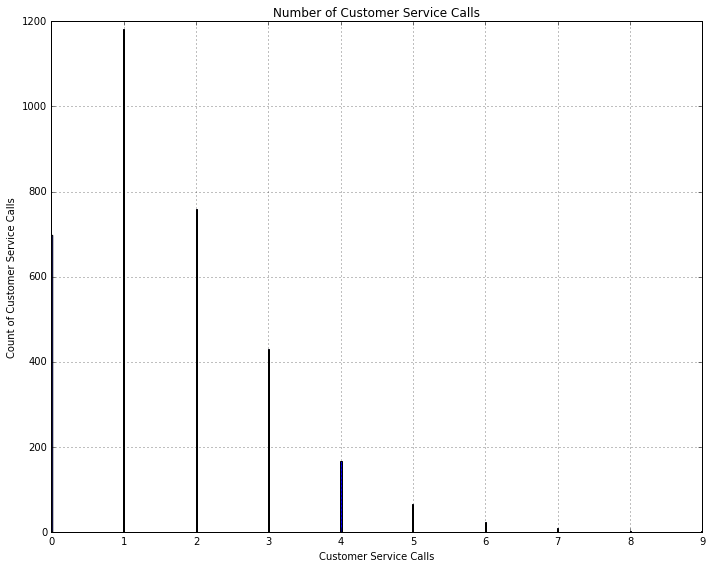

In [42]:
# Lets analyze the count of customer service calls
train_data['number customer service calls'].hist(bins=500,figsize=(10,8))
plt.title("Number of Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Count of Customer Service Calls")
plt.tight_layout()
plt.show()

In [43]:
# Lets see Account Length of customers here
Account_Length = train_data.groupby(['account length']).size()
#Account_Length # has length of 212

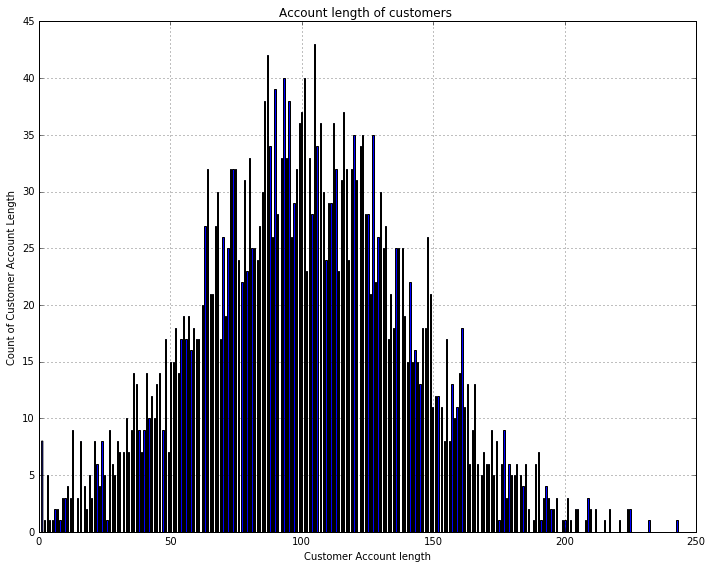

In [44]:
# Lets plot Histogram to analyze the account length
train_data['account length'].hist(bins=500,figsize=(10,8))
plt.title("Account length of customers ")
plt.xlabel("Customer Account length")
plt.ylabel("Count of Customer Account Length")
plt.tight_layout()
plt.show()

In [45]:
# Now Lets check the CHURN of Customers in Percent
Churn=train_data.groupby(['Churn']).size()
Churn # Here 0- Means 'False.'- > 'No', & Here 1- Means 'True.'- > 'Yes'

Churn
0    2850
1     483
dtype: int64

In [46]:
# Lets see the Percentage of Churn
print (" Negative Chrun in percent:{}".format((Churn[0]/3333)*100))
print (" Positive Chrun in percent:{}".format((Churn[1]/3333)*100))

 Negative Chrun in percent:85.5085508550855
 Positive Chrun in percent:14.491449144914492


In [47]:
# Lets see churn by international plan
Intl_Churn = train_data.groupby(['international plan','Churn']).size()
Intl_Churn

international plan  Churn
0                   0        2664
                    1         346
1                   0         186
                    1         137
dtype: int64

In [48]:
# Lets see churn by voice mail plan
Vmail_Churn = train_data.groupby(['voice mail plan', 'Churn']).size()
Vmail_Churn

voice mail plan  Churn
0                0        2008
                 1         403
1                0         842
                 1          80
dtype: int64

In [49]:
# Lets see churn by customer service calls
Custserv_Chrun=data.groupby(['number customer service calls','Churn']).size()
Custserv_Chrun

number customer service calls  Churn  
0                               False.     709
                                True.       96
1                               False.    1261
                                True.      141
2                               False.     820
                                True.       99
3                               False.     483
                                True.       57
dtype: int64

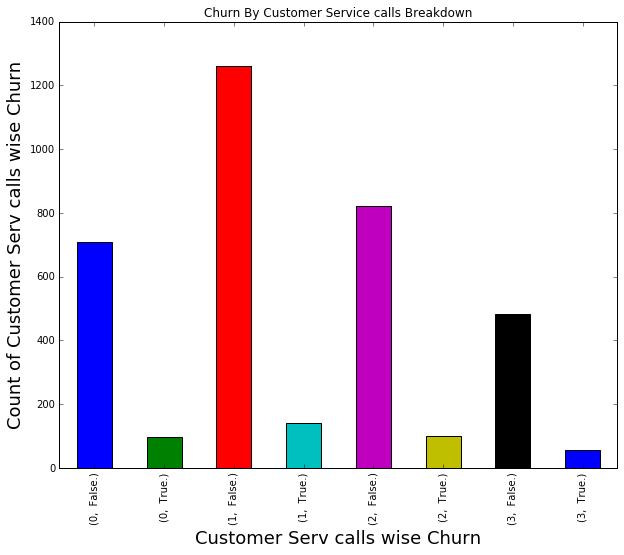

In [50]:
# Lets Plot to analyze the customer service calls as per Churn
Custserv_Chrun.plot(kind= 'bar', figsize=(10,8))
plt.title('Churn By Customer Service calls Breakdown')
plt.xlabel('Customer Serv calls wise Churn', fontsize=18)
plt.ylabel('Count of Customer Serv calls wise Churn', fontsize=18)
plt.show()

# Checking Distribution of Variables/ Normality Check

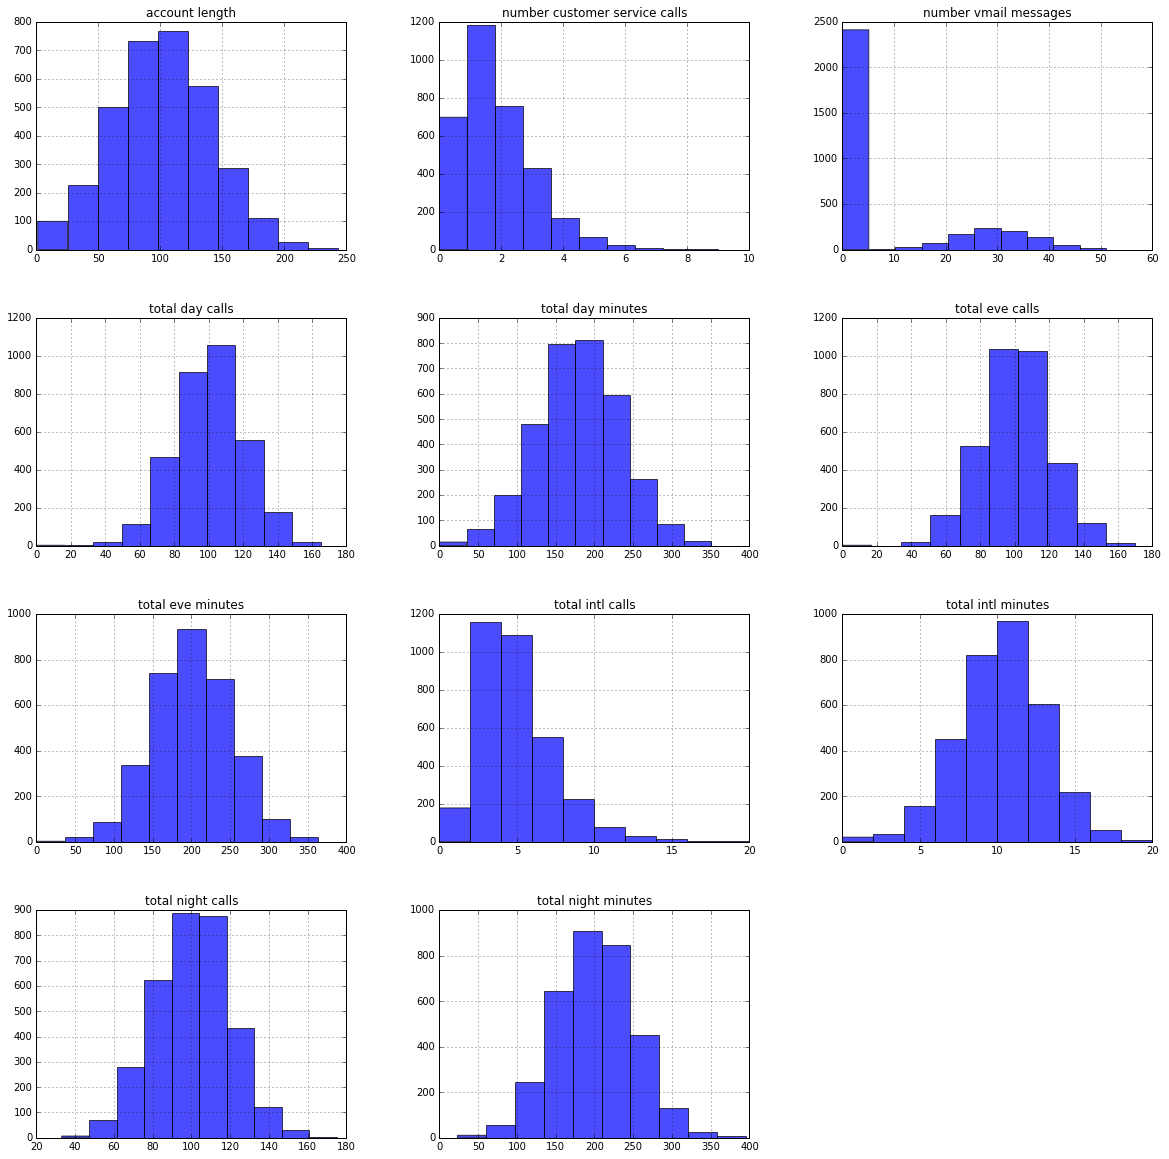

In [51]:
# Lets Check the Data Distribution of Continous variables  
train_data[cnames].hist(figsize=(20,20), alpha=0.7)
plt.show()

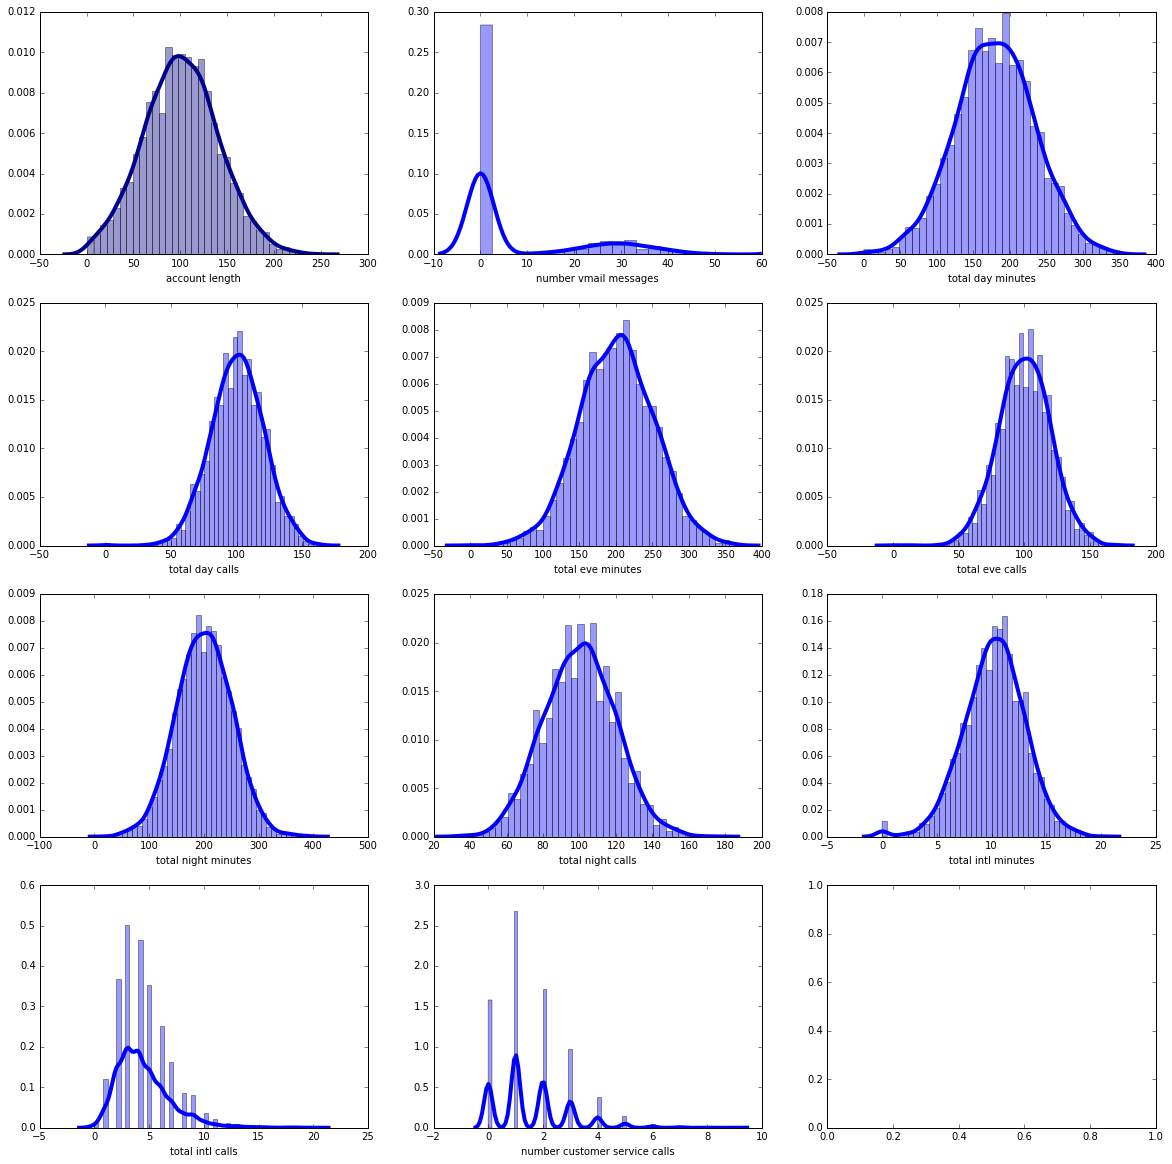

In [52]:
# Lets analyze better by also plotting density plot over histogram plot
# histogram and Density Plot togeather for checking distribution of our variables
f, axes = plt.subplots(4, 3, figsize=(20, 20))
#account length
sns.distplot(train_data['account length'], hist=True, bins='auto',kde=True,color = 'darkblue', ax=axes[0, 0],
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#number vmail messages
sns.distplot(train_data['number vmail messages'], hist=True, bins='auto',ax=axes[0, 1],
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total day minutes
sns.distplot(train_data['total day minutes'], hist=True, bins='auto',ax=axes[0, 2],
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total day calls
sns.distplot(train_data['total day calls'], hist=True, bins='auto',ax=axes[1, 0],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total eve minutes
sns.distplot(train_data['total eve minutes'], hist=True, bins='auto',ax=axes[1, 1],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total eve calls
sns.distplot(train_data['total eve calls'], hist=True, bins='auto',ax=axes[1, 2],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total night minutes
sns.distplot(train_data['total night minutes'], hist=True, bins='auto',ax=axes[2, 0],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total night calls
sns.distplot(train_data['total night calls'], hist=True, bins='auto',ax=axes[2, 1],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total international minutes
sns.distplot(train_data['total intl minutes'], hist=True, bins='auto',ax=axes[2, 2],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#total international calls
sns.distplot(train_data['total intl calls'], hist=True, bins='auto',ax=axes[3, 0],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#number customer service calls
sns.distplot(train_data['number customer service calls'], hist=True, bins='auto',ax=axes[3, 1],
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

As we can see that most of the variables are Uniformly Distributed.
So it is better to go for Standardization Method itself for Feature Scaling

# Feature Scaling and applying Standardization/Z-Score Method

In [53]:
# Standardization/ Z-Score Method
stand_zs = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
               'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 
               'total intl minutes', 'total intl calls', 'number customer service calls']

for i in stand_zs:
    print(i)
    train_data[i] = (train_data[i] - train_data[i].mean())/train_data[i].std()        

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [54]:
# Standardization/ Z-Score Method
stand_zs = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
               'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 
               'total intl minutes', 'total intl calls', 'number customer service calls']

for i in stand_zs:
    print(i)
    test_data[i] = (test_data[i] - test_data[i].mean())/test_data[i].std()

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [55]:
# Splitting the data into Train and Test Sets
X_train = train_data.drop('Churn', axis = 1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis = 1)
y_test = test_data['Churn']

In [56]:
# Lets print out the X_train, y_train, X_test and y_test
print('X_train values------>', X_train.shape)
print('y_train values------>', y_train.shape)
print('X_test values------->', X_test.shape)
print('y_test values------->', y_test.shape)

X_train values------> (3333, 13)
y_train values------> (3333,)
X_test values-------> (1667, 13)
y_test values-------> (1667,)


In [57]:
# As we can see there is target class imbalance problem, training values before applying Smote 
y_train.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

# SMOTE (Synthetic Minority Over-Sampling Technique)

we do synthetic data only on the train: SMOTE creates synthetic observations of the minority class (churn) by:

Finding the k-nearest-neighbors for minority class observations (finding similar observations)
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

we use smote only on the training data set

In [58]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
SMT = SMOTE()
X_train_balanced ,y_train_balanced = SMT.fit_sample(X_train, y_train)

In [59]:
print('X_training data set after SMOTE--->', X_train_balanced.shape)
print('y_training data set after SMOTE--->', y_train_balanced.shape)

X_training data set after SMOTE---> (5700, 13)
y_training data set after SMOTE---> (5700,)


# MODEL DEVELOPMENT

In [60]:
# Lets define our  Prediction Function to fit and make predictions
def predct_func(classification_models, features, comparison):
    ''' Here we are going to fit our train data by passing 
        to the funtion predct_func and predict our X_test 
        data which is our new test cases here and it will result 
        out classification-report and all the error metrics of the
        particular model used here.
    ''' 
    # Lets fit the model first
    classification_models.fit(features, comparison)
    # Predict new test cases
    predicted_vals = classification_models.predict(X_test)
    # Lets apply K-Fold Croos Validatiion CV=10
    KVC = cross_val_score(estimator=classification_models, X=features, y=comparison,cv=10)
    KFoldCross_Accuracies = KVC.mean()
    print('K Fold Crossvalidation Accuracy------->', KFoldCross_Accuracies)
    print()
    # Generates the classification report of the model
    print("************Classification Report*************")
    print()
    class_report = classification_report(y_test,predicted_vals)
    print(class_report)
    # Generate the Confusion Matrix of the Model
    print("************Confusion Matrix*******************")
    print()
    CM = confusion_matrix(y_test, predicted_vals)
    print(CM)


In [61]:
# Lets Define another function for Evaluation of out models
def eval_model(actual_vals, prediction_vals):
    ''' Function for evaluation of error metrics
        generates confusion matrix and results out
        False Positive Rate, False Negative Rate, 
        Sensitivity/TruePositiveRate/Recall & 
        specificity/TrueNegativeRate of models
    '''
    
    CM = pd.crosstab(actual_vals, prediction_vals)
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    print()
    
    # Lets evaluate Error Metrics of the model algorithms
    print("<---------------ERROR METRICS-------------->")
    print()
    # False Negative Rate
    print("False Negative Rate-------------->",  (FN*100)/(FN+TP))
    print()
    # False Positive Rate
    print("False Positive Rate-------------->",  (FP*100)/(FP+TN))
    print()
    # Sensitivity
    print("Sensitivity/TPR/Recall----------->",  (TP*100)/(TP+FN))
    print()
    # Specificity
    print("Specificity/TNR------------------>",  (TN*100)/(TN+FP))

In [62]:
# Lets Develop Decision Tree Model 
DT_Model = DecisionTreeClassifier(criterion='entropy',random_state=100)
predct_func(DT_Model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.932280701754

************Classification Report*************

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1443
           1       0.49      0.76      0.60       224

   micro avg       0.86      0.86      0.86      1667
   macro avg       0.73      0.82      0.76      1667
weighted avg       0.90      0.86      0.87      1667

************Confusion Matrix*******************

[[1267  176]
 [  54  170]]


In [63]:
# Lets predict new test cases
DT_Predictions = DT_Model.predict(X_test)

In [64]:
# Now Lets evaluate Error Metrics for Decision Tree model
eval_model(y_test, DT_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 24.1071428571

False Positive Rate--------------> 12.1968121968

Sensitivity/TPR/Recall-----------> 75.8928571429

Specificity/TNR------------------> 87.8031878032


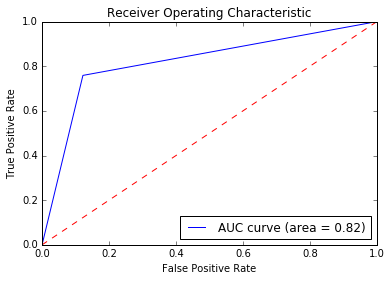

In [65]:
#ROC curve for false positive rate-fpr, true positive rate-tpr
# The ROC-Curve is the plot between sensitivity and (1-specificity) is also known as False positive rate
# and Sensitivity is also known as True Positive rate
# ROC-AUC Curve for Decision Tree MOdel
fpr, tpr, thresholds_DT = roc_curve(y_test, DT_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
# Lets Develop Random Forest Model 
RF_Model = RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=100)
predct_func(RF_Model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.96649122807

************Classification Report*************

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1443
           1       0.58      0.83      0.69       224

   micro avg       0.90      0.90      0.90      1667
   macro avg       0.78      0.87      0.81      1667
weighted avg       0.92      0.90      0.90      1667

************Confusion Matrix*******************

[[1310  133]
 [  38  186]]


In [67]:
# Lets Predict new test cases
RF_Predictions = RF_Model.predict(X_test)

In [68]:
# Lets Evaluate Error Metrics for Random Forest Model
eval_model(y_test, RF_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 16.9642857143

False Positive Rate--------------> 9.21690921691

Sensitivity/TPR/Recall-----------> 83.0357142857

Specificity/TNR------------------> 90.7830907831


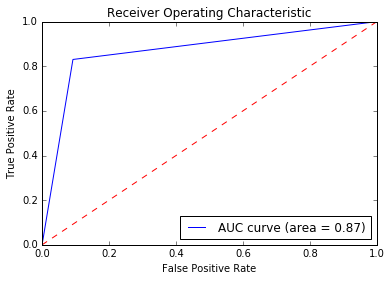

In [69]:
# ROC-AUC Curve for Random Forest Model
fpr, tpr, thresholds_RF = roc_curve(y_test, RF_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
# Lets Develop Logistic Regression Model
LR_Model = LogisticRegression()
predct_func(LR_Model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.777368421053

************Classification Report*************

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1443
           1       0.35      0.81      0.49       224

   micro avg       0.77      0.77      0.77      1667
   macro avg       0.66      0.79      0.67      1667
weighted avg       0.88      0.77      0.80      1667

************Confusion Matrix*******************

[[1105  338]
 [  42  182]]


In [71]:
# Lets Predict New Test Cases
LR_Predictions = LR_Model.predict(X_test)

In [72]:
# Now lets evaluate Error Metrics For Logistic Regression Model
eval_model(y_test, LR_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 18.75

False Positive Rate--------------> 23.4234234234

Sensitivity/TPR/Recall-----------> 81.25

Specificity/TNR------------------> 76.5765765766


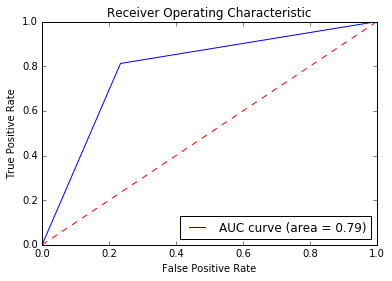

In [73]:
# ROC-AUC Curve for Logistic Regression Model
fpr, tpr, thresholds_RF = roc_curve(y_test, LR_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# Lets Develop KNN Model Now
KNN_Model = KNeighborsClassifier(n_neighbors=5)
predct_func(KNN_Model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.902807017544

************Classification Report*************

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1443
           1       0.36      0.66      0.46       224

   micro avg       0.80      0.80      0.80      1667
   macro avg       0.65      0.74      0.67      1667
weighted avg       0.86      0.80      0.82      1667

************Confusion Matrix*******************

[[1179  264]
 [  77  147]]


In [75]:
# Lets Predict New Test Cases
KNN_Predictions = KNN_Model.predict(X_test)

In [76]:
# Now lets evaluate Error Metrics For K-Nearest-Neighbor Model
eval_model(y_test, KNN_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 34.375

False Positive Rate--------------> 18.2952182952

Sensitivity/TPR/Recall-----------> 65.625

Specificity/TNR------------------> 81.7047817048


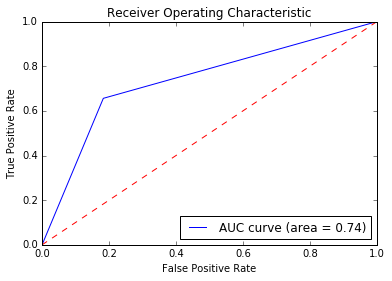

In [77]:
# ROC-AUC Curve for K-Nearest-Neighbor Model 
fpr, tpr, thresholds_RF = roc_curve(y_test, KNN_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
# Lets Develop Naive Bayes Model
NB_Model  = GaussianNB()
predct_func(NB_Model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.80649122807

************Classification Report*************

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1443
           1       0.37      0.83      0.51       224

   micro avg       0.79      0.79      0.79      1667
   macro avg       0.67      0.81      0.69      1667
weighted avg       0.89      0.79      0.82      1667

************Confusion Matrix*******************

[[1132  311]
 [  39  185]]


In [79]:
# Lets Predict new test cases
NB_Predictions = NB_Model.predict(X_test)

In [80]:
# Now lets evaluate Error Metrics For Naive Bayes Model
eval_model(y_test, NB_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 17.4107142857

False Positive Rate--------------> 21.5523215523

Sensitivity/TPR/Recall-----------> 82.5892857143

Specificity/TNR------------------> 78.4476784477


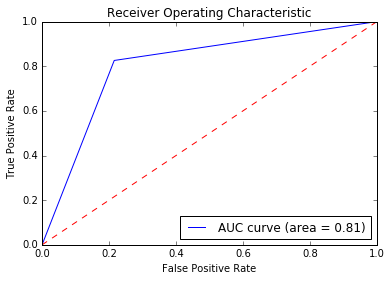

In [81]:
# ROC-AUC Curve for Naive Bayes Model
fpr, tpr, thresholds_RF = roc_curve(y_test, NB_Predictions)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hyperparameter tuning using GridSearchCV

~We will use <b>GridSearchCV</b> for tuning the parameters any two  algorithms, to achieve optimum performance.

~ Here i am going for Decision Tree & Random Forest Model for Tuning as both have performed well but out of these two Random forest is doing well.

~ We will be running the Hyper-Parameter Code for only once and save the results of our 
Final Model based Results for <b> Decision Tree<b/> and <b>Random Forest</b> we will finalize our final model which is having optimum performance after hyper parameter tuning. and here i am commenting the below code as it will take lot of time for execution.

In [94]:
#Hyper Parameter Tuning for Decision Tree Model
#from sklearn.model_selection import GridSearchCV

# Finding Best Parameters for Random Forest Model 
#dt_model = DecisionTreeClassifier()

#params_grid = [{'criterion': ['entropy','gini'],
#                'max_depth':[50,100,150,200,250,300,350]}] 

#grid_search = GridSearchCV(estimator=dt_model, param_grid=params_grid,
#                          scoring='recall', cv=10, n_jobs=-1)

#grid_search = grid_search.fit(X_train_balanced, y_train_balanced)
#best_accuracy = grid_search.best_score_
#print(best_accuracy)
#best_parameters = grid_search.best_params_
#print(best_parameters)

#accuracy_score = 0.944912280702
#best_parameters = {'criterion': 'gini', 'max_depth': 100}

0.944912280702
{'criterion': 'gini', 'max_depth': 100}


In [95]:
# Now lets apply the tuned parameters
#dt_model = DecisionTreeClassifier(criterion='gini',max_depth=100,random_state=100)
#predct_func(dt_model, X_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.928947368421

************Classification Report*************

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1443
           1       0.47      0.79      0.59       224

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.72      0.83      0.75      1667
weighted avg       0.90      0.85      0.87      1667

************Confusion Matrix*******************

[[1243  200]
 [  47  177]]


In [96]:
# lets predict predict new test cases on tuned decision tree model
#dt_Predictions  = dt_model.predict(X_test)

In [97]:
# Lets evaluate error metrics on our tuned decision tree model
#eval_model(y_test, dt_Predictions)


#<---------------ERROR METRICS-------------->

#False Negative Rate--------------> 20.9821428571

#False Positive Rate--------------> 13.86001386

#Sensitivity/TPR/Recall-----------> 79.0178571429

#Specificity/TNR------------------> 86.13998614


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 20.9821428571

False Positive Rate--------------> 13.86001386

Sensitivity/TPR/Recall-----------> 79.0178571429

Specificity/TNR------------------> 86.13998614


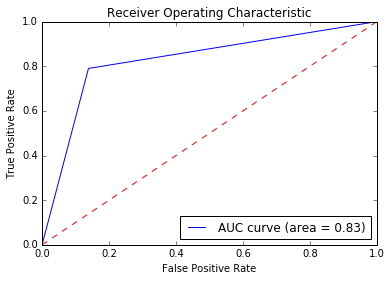

In [98]:
# ROC-AUC Curve for tuned - decision tree
#fpr, tpr, thresholds_RF = roc_curve(y_test, dt_Predictions)
#roc_auc = auc(fpr, tpr)
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
#plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

~ As we can observe that False neagtive rate has reduced after applying hyper-parameter tuning on decision tree model and accuracy and aur-roc curve has also improved when compared.

In [99]:
#Hyper Parameter Tuning for Random Forest Model
#from sklearn.model_selection import GridSearchCV

# Finding Best Parameters for Random Forest Model 
#rf_model = RandomForestClassifier()

#params_grid = [{'n_estimators':[100,200,300,400,500,800,1000],
#                'criterion': ['entropy','gini'],
#                'max_depth':[50,100,150,200,250,300,350]}] 

#grid_search = GridSearchCV(estimator=rf_model, param_grid=params_grid,
#                          scoring='recall', cv=10, n_jobs=-1)

#grid_search = grid_search.fit(X_train_balanced, y_train_balanced)
#best_accuracy = grid_search.best_score_
#print(best_accuracy)
#best_parameters = grid_search.best_params_
#print(best_parameters)

#accuracy_score = 0.964912280702
#best_parameters = {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 300}

0.964912280702
{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 300}


In [100]:
# lets run Tuned Random Forest Model on our prediction function 
#rf_model = RandomForestClassifier(criterion='entropy', n_estimators=300, max_depth =500, random_state=100)

#predct_func(rf_model, X_train_balanced, y_train_balanced)

## K Fold Crossvalidation Accuracy-------> 0.966666666667

K Fold Crossvalidation Accuracy-------> 0.966666666667

************Classification Report*************

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1443
           1       0.59      0.84      0.69       224

   micro avg       0.90      0.90      0.90      1667
   macro avg       0.78      0.88      0.82      1667
weighted avg       0.92      0.90      0.91      1667

************Confusion Matrix*******************

[[1310  133]
 [  35  189]]


In [101]:
# Now lets Predict new test cases for Tuned Random Forest Final  Predictions
#rf_Predictions = rf_model.predict(X_test)

In [102]:
# Now Lets Evaluate Error Metrics for Tuned Randoom Forest Model
#eval_model(y_test, rf_Predictions)

# Final Model Error metrics of FINAL MODEL Random Forest

#<---------------ERROR METRICS-------------->

#False Negative Rate--------------> 15.625

#False Positive Rate--------------> 9.21690921691

#Sensitivity/TPR/Recall-----------> 84.375

#Specificity/TNR------------------> 90.7830907831

# we can observe that the False Negative Rate has Reduced compare to previous RF_Model and Tuned rf_model is working well.


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 15.625

False Positive Rate--------------> 9.21690921691

Sensitivity/TPR/Recall-----------> 84.375

Specificity/TNR------------------> 90.7830907831


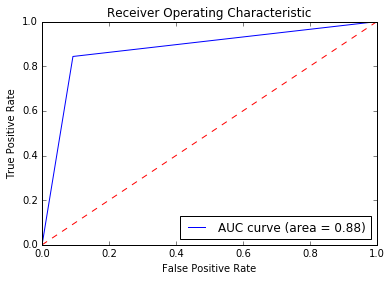

In [103]:
# ROC-AUC Curve for Tuned - Random Forest Model
#fpr, tpr, thresholds_RF = roc_curve(y_test, rf_Predictions)
#roc_auc = auc(fpr, tpr)
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b',label='AUC curve (area = %0.2f)'% roc_auc)
#plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

~ So here we Conclude that Our <b>FINAL MODEL IS TUNED RANDOM FOREST MODEL</b> and it is giving best results with 
optimum performance when compared with other models.

# Feature Importances 

lets see which features/predictors carry much information to explain out Target Variable

importance                         labels
4     0.214719              total day minutes
12    0.159367  number customer service calls
1     0.120895             international plan
11    0.088173               total intl calls
6     0.087321              total eve minutes

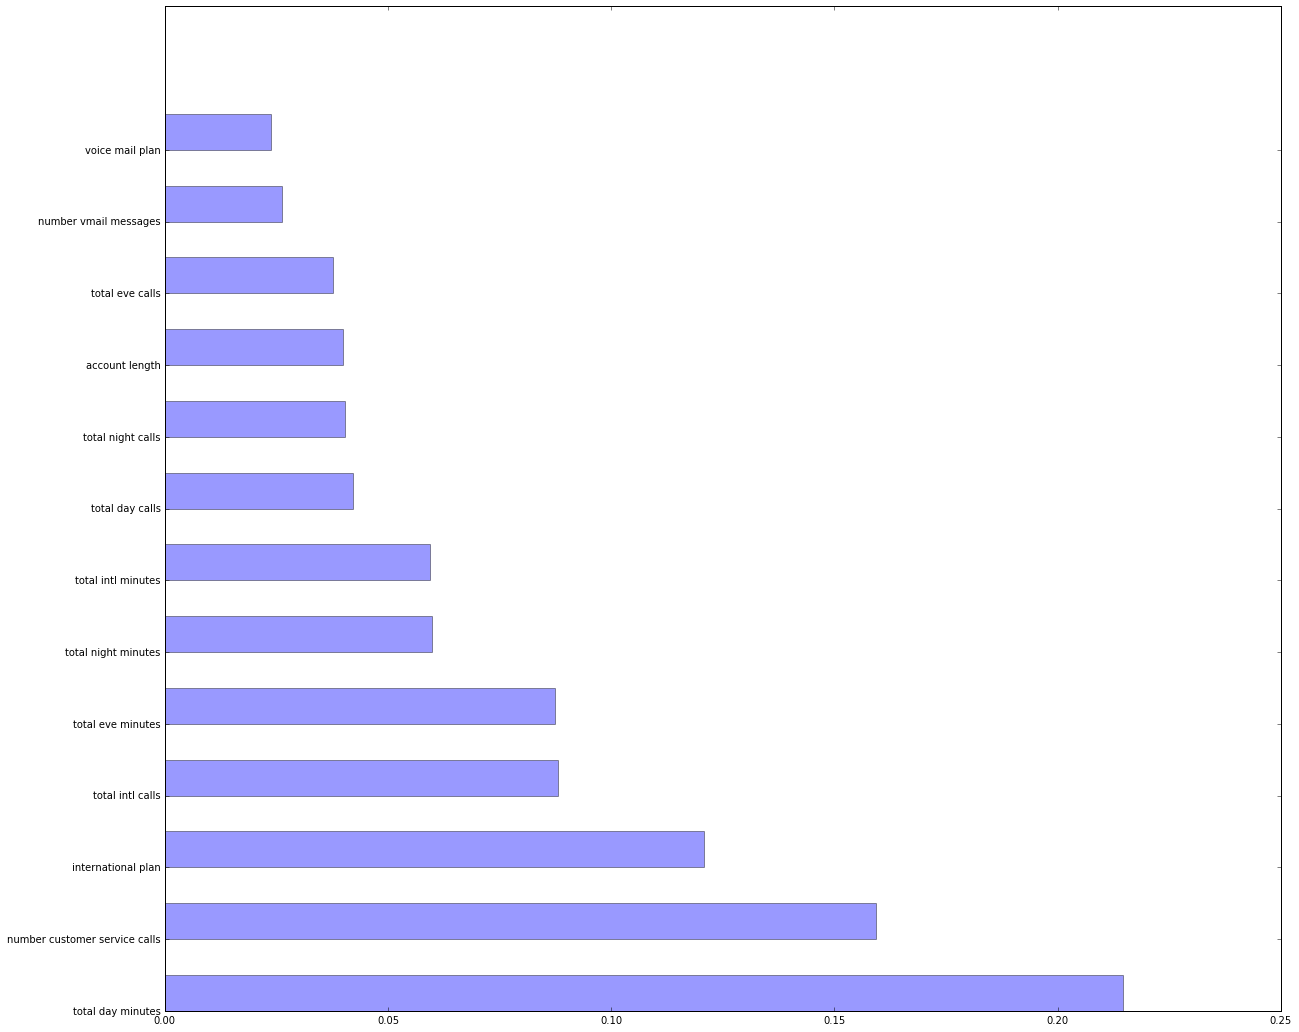

In [104]:
# Lets Plot Feature importances
#features = train_data.drop(["Churn"], axis=1).columns
#fig = plt.figure(figsize=(20, 18))
#ax = fig.add_subplot(111)
#FI = pd.DataFrame(rf_model.feature_importances_, columns=["importance"])
#FI["labels"] = features
#FI.sort_values("importance", inplace=True, ascending=False)
#display(FI.head(5))
#index = np.arange(len(rf_model.feature_importances_))
#bar_width = 0.5
#rects = plt.barh(index , FI["importance"], bar_width, alpha=0.4, color='b', label='Main')
#plt.yticks(index, FI["labels"])
#plt.show()

~ The above code section has been commented out because it takes more time consumption while running so if there is a need 
to run i suggest to comment it out.

In [105]:
# Setting up the working directory
os.chdir("E:\DataScienceEdwisor\PROJECT-1\Python")

# Lets Save the final results back to hard disk
# Writing a csv (output) Training & Test Data-set

train_data.to_csv("train_df_final_data.csv", index = False)
test_data.to_csv("test_df_final_data.csv", index = False)